In [177]:
import pandas as pd


In [178]:
df=pd.read_csv('Automobile1.csv')

In [179]:
df

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [180]:
df['price'].fillna(15387,inplace=True)

C:\Users\nihal\AppData\Local\Temp\ipykernel_9028\3071471888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(15387,inplace=True)


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             61 non-null     int64  
 1   company           61 non-null     object 
 2   body-style        61 non-null     object 
 3   wheel-base        61 non-null     float64
 4   length            61 non-null     float64
 5   engine-type       61 non-null     object 
 6   num-of-cylinders  61 non-null     object 
 7   horsepower        61 non-null     int64  
 8   average-mileage   61 non-null     int64  
 9   price             61 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.9+ KB


In [182]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [183]:
df['company']=l.fit_transform(df['company'])

In [184]:
df['body-style']=l.fit_transform(df['body-style'])

In [185]:
df['engine-type']=l.fit_transform(df['engine-type'])

In [186]:
df['num-of-cylinders']=l.fit_transform(df['num-of-cylinders'])

In [187]:
import matplotlib.pyplot as plt

In [188]:
from sklearn.cluster import KMeans

In [189]:
sse=[]
for k in range(2,11):
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

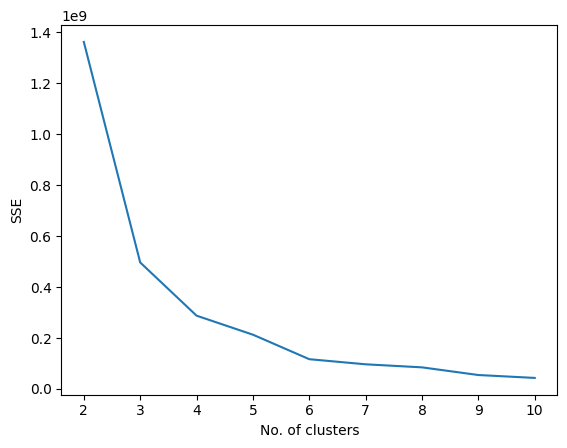

In [190]:
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.plot(range(2,11),sse)

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [192]:
km_model=KMeans(n_clusters=3)
prediction=km_model.fit_predict(df)
prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2], dtype=int32)

In [193]:
df['Clusters']=prediction
df

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,Clusters
0,0,0,0,88.6,168.8,0,2,111,21,13495.0,2
1,1,0,0,88.6,168.8,0,2,111,21,16500.0,2
2,2,0,2,94.5,171.2,5,3,154,19,16500.0,2
3,3,1,3,99.8,176.6,3,2,102,24,13950.0,2
4,4,1,3,99.4,176.6,3,1,115,18,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...
56,81,14,3,97.3,171.7,3,2,85,27,7975.0,0
57,82,14,3,97.3,171.7,3,2,52,37,7995.0,0
58,86,14,3,97.3,171.7,3,2,100,26,9995.0,0
59,87,15,3,104.3,188.8,3,2,114,23,12940.0,2


In [194]:
km_model.cluster_centers_

array([[4.98965517e+01, 9.48275862e+00, 2.75862069e+00, 9.49241379e+01,
        1.63520690e+02, 2.96551724e+00, 2.06896552e+00, 6.95517241e+01,
        3.17586207e+01, 7.01196552e+03],
       [3.68181818e+01, 7.09090909e+00, 2.45454545e+00, 1.06081818e+02,
        1.91518182e+02, 3.18181818e+00, 2.45454545e+00, 1.87727273e+02,
        1.58181818e+01, 3.62199091e+04],
       [3.05714286e+01, 5.61904762e+00, 2.71428571e+00, 9.94142857e+01,
        1.76676190e+02, 2.80952381e+00, 2.09523810e+00, 1.18904762e+02,
        2.28095238e+01, 1.60400476e+04]])

In [195]:
df1=df[df['Clusters']==0]
df2=df[df['Clusters']==1]
df3=df[df['Clusters']==2]

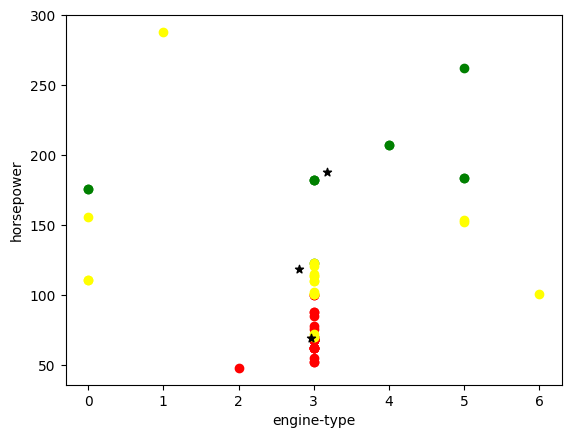

In [196]:
plt.scatter(df1['engine-type'],df1['horsepower'],color='red')
plt.scatter(df2['engine-type'],df2['horsepower'],color='green')
plt.scatter(df3['engine-type'],df3['horsepower'],color='yellow')
plt.xlabel('engine-type')
plt.ylabel('horsepower')
centers=km_model.cluster_centers_
plt.scatter(centers[:,5],centers[:,7],marker='*',color='black')

2


In [197]:
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,Clusters
0,0.000000,0.000000,0.00,0.006154,0.413433,0.000000,0.333333,0.262500,0.235294,0.207309,1.0
1,0.011364,0.000000,0.00,0.006154,0.413433,0.000000,0.333333,0.262500,0.235294,0.281970,1.0
2,0.022727,0.000000,0.50,0.187692,0.449254,0.833333,0.500000,0.441667,0.176471,0.281970,1.0
3,0.034091,0.066667,0.75,0.350769,0.529851,0.500000,0.333333,0.225000,0.323529,0.218614,1.0
4,0.045455,0.066667,0.75,0.338462,0.529851,0.500000,0.166667,0.279167,0.147059,0.305573,1.0


In [198]:
from scipy.cluster.hierarchy import dendrogram,linkage

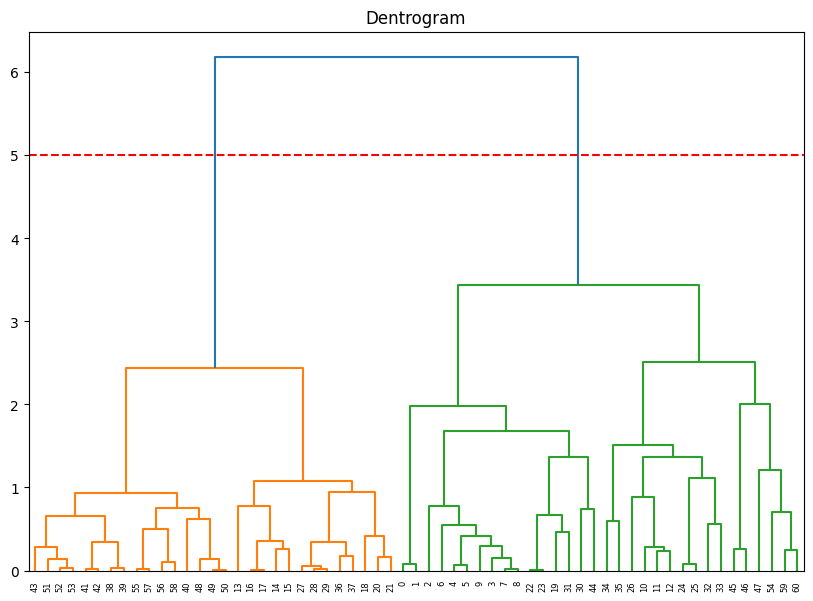

In [200]:
plt.figure(figsize=(10,7))
plt.title('Dentrogram')
dend=dendrogram(linkage(df_scaled,method='ward'))
plt.axhline(y=5,color='r',linestyle='--')

In [201]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [202]:
clusters=model.fit_predict(df_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

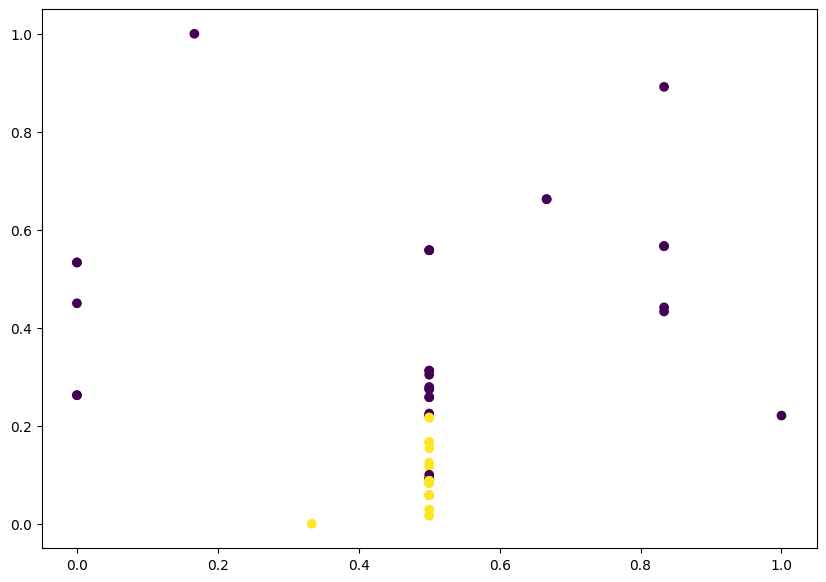

In [203]:
plt.figure(figsize=(10,7))
plt.scatter(df_scaled['engine-type'],df_scaled['horsepower'],c=clusters)